## *Кислик Мария, ММР213*

## Введение

Датасет содержит данные о гостях отеля в Лиссабоне. Мы будем анализировать, как различные факторы влияют на размер суммарных расходов гостей. Суммарные расходы будут рассчитаны как сумма стандартных расходов (стоимость номера, наличие кроватки в номере и т.д.) и дополнительных расходов (еда, напитки, СПА и т.д.).

## Описание переменных

*Количественные и категориальные переменные:*
- **Age** -	Customer's age (in years) at the last day of the extraction period
- **DaysSinceCreation** - Number of days since the customer record was created (number of days elapsed between the creation date and the last day of the extraction period)
- **AverageLeadTime** -	The average number of days elapsed between the customer's booking date and arrival date. In other words, this variable is calculated by dividing the sum of the number of days elapsed between the moment each booking was made and its arrival date, by the total of bookings made by the customer
- **LodgingRevenue**	-	Total amount spent on lodging expenses by the customer (in Euros). This value includes room, crib, and other related lodging expenses
- **OtherRevenue**	-	Total amount spent on other expenses by the customer (in Euros). This value includes food, beverage, spa, and other expenses
- **BookingsCanceled** -	Number of bookings the customer made but subsequently canceled (the costumer informed the hotel he/she would not come to stay)
- **BookingsNoShowed** -	Number of bookings the customer made but subsequently made a “no-show” (did not cancel, but did not check-in to stay at the hotel)
- **BookingsCheckedIn** -	Number of bookings the customer made, and which end up with a staying
- **RoomNights**	- Total of room/nights the customer stayed at the hotel (checked-in bookings). Room/nights are the multiplication of the number of rooms of each booking by the number of nights of the booking
- **DistributionChannel** -	Distribution channel usually used by the customer to make bookings at the hotel *(categorical variable)*
- **MarketSegment** -	Current market segment of the customer *(categorical variable)*

*Бинарные переменные:*
- **SRBathtub**	-	Indication if the customer usually asks for a room with a bathtub (0: No, 1: Yes)
- **SRShower**	-	Indication if the customer usually asks for a room with a shower (0: No, 1: Yes)
- **SRCrib**	-	Indication if the customer usually asks for a crib (0: No, 1: Yes)
- **SRKingSizeBed**	-	Indication if the customer usually asks for a room with a king-size bed (0: No, 1: Yes)
- **SRTwinBed**	-	Indication if the customer usually asks for a room with a twin bed (0: No, 1: Yes)

В данных также присутствовали переменные, которые не пригодятся для анализа (например, номер ID покупателя), поэтому они не присутствуют в описании переменных и будут удалены.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# уберем предупреждения
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel('HotelCustomersDataset.xlsx')

In [3]:
df.head()

,ID,Nationality,Age,DaysSinceCreation,NameHash,DocIDHash,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,...,SRMediumFloor,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNearElevator,SRAwayFromElevator,SRNoAlcoholInMiniBar,SRQuietRoom
0,1,PRT,51.0,150,0x8E0A7AF39B633D5EA25C3B7EF4DFC5464B36DB7AF375...,0x71568459B729F7A7ABBED6C781A84CA4274D571003AC...,45,371.0,105.3,1,...,0,0,0,0,0,0,0,0,0,0
1,2,PRT,NaN,1095,0x21EDE41906B45079E75385B5AA33287CA09DE1AB86DE...,0x5FA1E0098A31497057C5A6B9FE9D49FD6DD47CCE7C26...,61,280.0,53.0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,DEU,31.0,1095,0x31C5E4B74E23231295FDB724AD578C02C4A723F4BA2B...,0xC7CF344F5B03295037595B1337AC905CA188F1B5B3A5...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,FRA,60.0,1095,0xFF534C83C0EF23D1CE516BC80A65D0197003D27937D4...,0xBD3823A9B4EC35D6CAF4B27AE423A677C0200DB61E82...,93,240.0,60.0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,FRA,51.0,1095,0x9C1DEF02C9BE242842C1C1ABF2C5AA249A1EEB4763B4...,0xE175754CF77247B202DD0820F49407C762C14A603B3A...,0,0.0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


## 1. Первичная работа с данными

### 1.1. Очистка данных

Удаляем переменные, которые не понадобятся для анализа.

In [4]:
del df['ID'] # Customer ID
del df['NameHash'] # Name of the customer's SHA2–256 hash string
del df['DocIDHash'] # SHA2–256 hash-string of the identification document number the customer provided at check-in
del df['DaysSinceFirstStay'] # The number of days elapsed between the last day of the extraction and the customer's first arrival date
del df['DaysSinceLastStay'] # The number of days elapsed between the last day of the extraction and the customer's last arrival date
del df['Nationality'] # Country of origin (categorical variable), не используем в анализе, т.к. эту переменную очень проблематично адаптировать для регрессии

Помимо этого, было принято решение удалить некоторые бинарные переменные, которые обычно **не влияют на цену номера и не требуют дополнительных затрат (т.е. не влияют на стандартные/доп. расходы гостей)** => данные переменные не представляют интерес для данного исследования.

In [5]:
del df['SRAccessibleRoom'] # Indication if the customer usually asks for an accessible room (0: No, 1: Yes)
del df['SRHighFloor'] # Indication if the customer usually asks for a room on a higher floor (0: No, 1: Yes)
del df['SRLowFloor'] # Indication if the customer usually asks for a room on a lower floor (0: No, 1: Yes)
del df['SRMediumFloor'] # Indication if the customer usually asks for a room on a medium floor (0: No, 1: Yes)
del df['SRNearElevator'] # Indication if the customer usually asks for a room near the elevator (0: No, 1: Yes)
del df['SRAwayFromElevator'] # Indication if the customer usually asks for a room away from the elevator (0: No, 1: Yes)
del df['SRQuietRoom'] # Indication if the customer usually asks for a room away from the noise (0: No, 1: Yes)

Также придется удалить переменную **PersonsNights**, которая не несет никакой смысловой нагрузки, поскольку вычисляется как произведение всех ночей (сумма ночей по всем букингам) и числа людей в номере.

In [6]:
del df['PersonsNights']
# Описание переменной:
# The total number of persons/nights that the costumer stayed at the hotel. 
# This value is calculated by summing all customers checked-in bookings’ persons/nights. 
# Person/nights of each booking is the result of the multiplication of the number of staying nights by the sum of adults and children

Однако было решено оставить подобную предыдущей переменную **RoomNights**, которая вычисляется как произведение числа забронированных комнат при каждом букинге и числа проведенных в номере ночей. Можно предположить, что при одном бронировании человек обычно заказывает один номер, поэтому данная переменная означает суммарное количество ночей за все букинги. Поэтому в дальнейшем эта переменная будет интерпретироваться как **общее число забронированных ночей за время существования аккаунта пользователя**.

Посмотрим на значения этой переменной.

In [7]:
df.RoomNights.value_counts()

0      19920
3      17149
2      14115
1      11381
4      11158
5       5050
7       1937
6       1853
8        372
9        198
10       153
11        69
12        52
14        41
15        31
13        23
16        11
19        10
17         8
21         7
26         6
18         6
22         6
24         3
30         3
20         2
29         2
23         2
31         2
27         2
35         1
40         1
38         1
59         1
42         1
25         1
28         1
95         1
51         1
185        1
49         1
34         1
33         1
116        1
37         1
66         1
88         1
36         1
Name: RoomNights, dtype: int64

Мы видим, что в данных есть 19990 пользователей, которые не забронировали ни одного номера за время существования их аккаунта. Удалим эти наблюдения, поскольку нас интересуют люди, которые пользовались услугами отеля хотя бы один раз за время существования их аккаунта.

In [8]:
df = df[df.RoomNights != 0]

Также проверим наличие людей с нулевыми стандартными расходами (LodgingRevenue = 0).

In [9]:
df.LodgingRevenue.value_counts()

126.00    636
234.00    591
249.00    507
0.00      488
89.00     371
         ... 
779.40      1
293.73      1
364.30      1
55.35       1
981.30      1
Name: LodgingRevenue, Length: 10257, dtype: int64

Удалим наблюдения по этим людям, т.к. они не представляют интереса для анализа.

In [10]:
df = df[df.LodgingRevenue > 0]

### 1.2. Работа с пропусками

Проверим датасет на наличие пропусков.

In [11]:
df.isna().sum()

Age                     2802
DaysSinceCreation          0
AverageLeadTime            0
LodgingRevenue             0
OtherRevenue               0
BookingsCanceled           0
BookingsNoShowed           0
BookingsCheckedIn          0
RoomNights                 0
DistributionChannel        0
MarketSegment              0
SRBathtub                  0
SRShower                   0
SRCrib                     0
SRKingSizeBed              0
SRTwinBed                  0
SRNoAlcoholInMiniBar       0
dtype: int64

Как мы можем видеть, в переменной Age присутствует **2802 пропуска**. Заменим их средним значением переменной Age и перезапишем эту переменную.

In [12]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [13]:
df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,RoomNights,DistributionChannel,MarketSegment,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNoAlcoholInMiniBar
0,51.000000,150,45,371.0,105.3,1,0,3,5,Corporate,Corporate,0,0,0,0,0,0
1,47.292878,1095,61,280.0,53.0,0,0,1,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0
3,60.000000,1095,93,240.0,60.0,0,0,1,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0
5,54.000000,1095,58,230.0,24.0,0,0,1,2,Travel Agent/Operator,Other,0,0,0,0,0,0
7,32.000000,1095,38,535.0,94.0,0,0,1,5,Travel Agent/Operator,Other,0,0,0,1,0,0


### 1.3. Дескриптивные статистики

Посмотрим **дескриптивные статистики** по переменным. Все переменные с приставкой SR в начале названия являются бинарными, поэтому их статистики не имеют особого смысла, за исключением среднего - оно условно указывает на долю значений "1".

In [14]:
df.describe()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,RoomNights,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNoAlcoholInMiniBar
count,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000,63182.000000
mean,47.292878,526.628391,87.239467,395.316173,89.132122,0.002422,0.000839,1.041737,3.102672,0.002691,0.001741,0.009322,0.348707,0.137112,0.000079
std,14.639119,302.609539,91.060925,381.796436,121.571862,0.074708,0.033981,0.597592,2.128428,0.051802,0.041689,0.096102,0.476565,0.343968,0.008896
min,-11.000000,0.000000,-1.000000,18.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,255.000000,16.000000,187.220000,28.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,47.292878,528.000000,59.000000,305.600000,56.000000,0.000000,0.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,57.000000,798.000000,131.750000,472.000000,110.000000,0.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,114.000000,1095.000000,588.000000,21781.000000,7730.250000,9.000000,3.000000,66.000000,185.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Мы видим, что в минимальные значения по переменным Age и AverageLeadTime отрицательные, хотя такого не должно быть. Оставим в датасете только те значения, которые больше нуля.

In [15]:
df = df[(df['Age'] > 0) & (df['DaysSinceCreation'] > 0)]

In [16]:
df.head()

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,RoomNights,DistributionChannel,MarketSegment,SRBathtub,SRShower,SRCrib,SRKingSizeBed,SRTwinBed,SRNoAlcoholInMiniBar
0,51.000000,150,45,371.0,105.3,1,0,3,5,Corporate,Corporate,0,0,0,0,0,0
1,47.292878,1095,61,280.0,53.0,0,0,1,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0
3,60.000000,1095,93,240.0,60.0,0,0,1,5,Travel Agent/Operator,Travel Agent/Operator,0,0,0,0,0,0
5,54.000000,1095,58,230.0,24.0,0,0,1,2,Travel Agent/Operator,Other,0,0,0,0,0,0
7,32.000000,1095,38,535.0,94.0,0,0,1,5,Travel Agent/Operator,Other,0,0,0,1,0,0


In [17]:
df.Age.mean()

47.309886337239924

Среднее значение по возрасту изменилось несильно, поэтому не будем его заменять (после заполнения пропусков средним значением по переменной).

### 1.4. Выбросы

Построим ящики с усами для переменных по расходам гостей, чтобы проверить наличие выбросов в этих переменных.

Проверим наличие выбросов в переменной **OtherRevenue** (прочие расходы гостей).

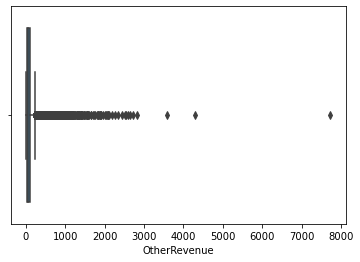

In [18]:
sns.boxplot(x=df['OtherRevenue'])
plt.show()

Как мы можем видеть, ящик с усами определил достаточно много выбросов. Попробуем определить их с помощью метода 2.5 среднеквадратических отклонений.

In [19]:
mean = df['OtherRevenue'].mean()
std = df['OtherRevenue'].std()
std_outlier_threshold_bottom = mean - 2.5 * std
std_outlier_threshold_up = mean + 2.5 * std
print('Нижняя граница =', std_outlier_threshold_bottom)
print('Верняя граница =', std_outlier_threshold_up)

Нижняя граница = -214.8723924272042
Верняя граница = 393.0967322770198


In [20]:
df[df['OtherRevenue'] > std_outlier_threshold_up].shape

(1353, 17)

In [21]:
df[df['OtherRevenue'] < std_outlier_threshold_bottom].shape

(0, 17)

Таким образом, метод 3 среднеквадратических отклонений выявил **1353 выброса "сверху"** и ни одного "снизу". На ящике с усами последние также отсутствовали. Удалим выбросы.

In [22]:
# перезаписываем имеющийся датасет, исключив из него выбросы по переменной OtherRevenue (прочие расходы)
df = df[df['OtherRevenue'] <= std_outlier_threshold_up]

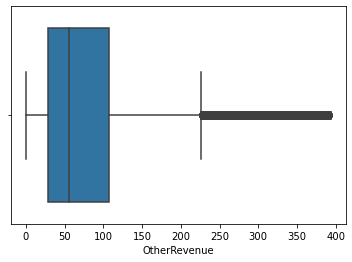

In [23]:
sns.boxplot(x=df['OtherRevenue'])
plt.show()

График ящика с усами стал более адекватным. Он все еще показывает наличие выбросов, однако можно считать, что необходимые выбросы мы удалили, использовав метод 2.5 среднеквадратических отклонений.

Проделаем те же операции для переменной **LodgingRevenue**.

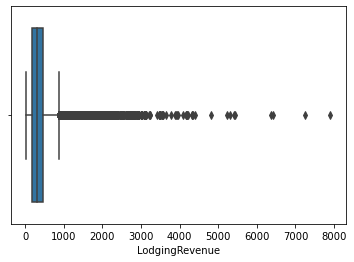

In [24]:
sns.boxplot(x=df['LodgingRevenue'])
plt.show()

Применяем метод 2.5 среднеквадратических отклонений для выявления выбросов.

In [25]:
mean_lodg = df['LodgingRevenue'].mean()
std_lodg = df['LodgingRevenue'].std()
std_outlier_threshold_bottom_lodg = mean_lodg - 2.5 * std_lodg
std_outlier_threshold_up_lodg = mean_lodg + 2.5 * std_lodg
print('Нижняя граница =', std_outlier_threshold_bottom_lodg)
print('Верняя граница =', std_outlier_threshold_up_lodg)

Нижняя граница = -440.37415637551953
Верняя граница = 1200.1448870009315


In [26]:
df[df['LodgingRevenue'] > std_outlier_threshold_up_lodg].shape

(1604, 17)

In [27]:
df[df['LodgingRevenue'] < std_outlier_threshold_bottom_lodg].shape

(0, 17)

По переменной LodgingRevenue анализ показал наличие **1604 выбросов** "сверху". Удалим эти наблюдения из датасета.

In [28]:
df = df[df['LodgingRevenue'] <= std_outlier_threshold_up_lodg]

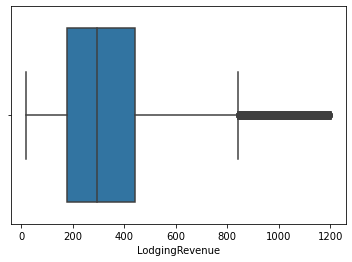

In [29]:
sns.boxplot(x=df['LodgingRevenue'])
plt.show()

In [30]:
df.count()

Age                     60165
DaysSinceCreation       60165
AverageLeadTime         60165
LodgingRevenue          60165
OtherRevenue            60165
BookingsCanceled        60165
BookingsNoShowed        60165
BookingsCheckedIn       60165
RoomNights              60165
DistributionChannel     60165
MarketSegment           60165
SRBathtub               60165
SRShower                60165
SRCrib                  60165
SRKingSizeBed           60165
SRTwinBed               60165
SRNoAlcoholInMiniBar    60165
dtype: int64

После очистки данных у нас осталось **60165 наблюдений**.

### 1.5. Cоздание новых переменных, анализ категориальных переменных

Создадим переменную для **общих расходов гостей** (стандартные + прочие).

In [31]:
df['TotalRevenue'] = df['LodgingRevenue'] + df['OtherRevenue']

<AxesSubplot:xlabel='TotalRevenue', ylabel='Count'>

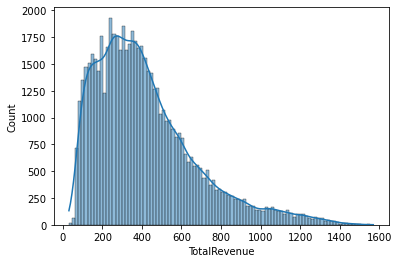

In [32]:
sns.histplot(df['TotalRevenue'], kde=True)

Мы видим, что **переменная суммарных расходов распределена не нормально**.

Создадим переменную **MonthSinceCreation** (число месяцев, прошедшее с момента регистрации аккаунта до выгрузки данных) для более удобной дальнейшей интерпретации.

In [33]:
df['MonthsSinceCreation'] = df['DaysSinceCreation'] / 12

<AxesSubplot:>

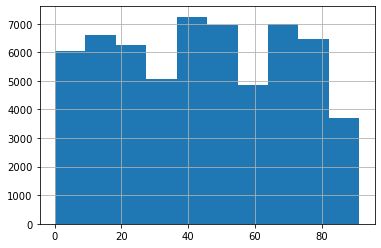

In [34]:
df['MonthsSinceCreation'].hist()

Здесь мы видим распределение переменной **MonthsSinceCreation**. Так, пики наблюдаются примерно в 10, 40 и 70 месяцах существования аккаунта гостя.

Посмотрим на значения переменной **DistributionChannel** - канала, через который гость совершает букинг. Эта переменная представляет интерес, поскольку в зависимости от того, каким способом гость бронировал отель, его расходы могут отличаться (например, когда номер бронируется через корп. каналы отеля и когда бронированием занимается туроператор).

In [35]:
df['DistributionChannel'].value_counts()

Travel Agent/Operator      49783
Direct                      7681
Corporate                   2223
Electronic Distribution      478
Name: DistributionChannel, dtype: int64

Для удобства отобразим результаты на **круговой диаграмме**.

<AxesSubplot:ylabel='DistributionChannel'>

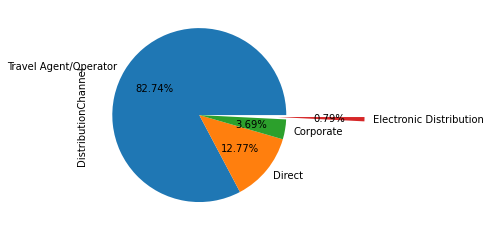

In [36]:
df.DistributionChannel.value_counts().plot.pie(autopct = '%0.2f%%', explode = [0, 0, 0, 0.9])

Как мы можем видеть, более 80% гостей бронируют отель через туроператоров или агентства (**Travel Agent/Operator**), 13% бронируют номер напрямую через отдел продаж отеля (традиционное бронирование через обычного менеджера) (**Direct**), 4% гостей осуществляют бронирование через корп. каналы отеля (сайт) (**Corporate**) и менее 1% бронируют номера через системы онлайн-бронирования (Booking.com, AirBnb и т.д.) (**ElectronicDistribution**).

Посмотрим на значения переменных **BookingsCanceled**, **BookingsNoShowed** и **BookingsCheckedIn**.

In [37]:
df.BookingsCanceled.value_counts()

0    60092
1       57
3        7
2        7
9        1
4        1
Name: BookingsCanceled, dtype: int64

In [38]:
df.BookingsNoShowed.value_counts()

0    60131
1       31
2        3
Name: BookingsNoShowed, dtype: int64

In [39]:
df.BookingsCheckedIn.value_counts()

1     59037
2       929
3        94
4        44
6        17
5        13
8         9
7         8
9         6
11        2
13        2
15        1
57        1
14        1
10        1
Name: BookingsCheckedIn, dtype: int64

Как мы можем видеть, большинство гостей ни разу не отменяло бронирование. Точно так же у большинства гостей не было случаев, когда у них была бронь, но они не заселились в номер (не приехали в отель, при этом не отменив бронь). Также мы можем видеть, что у абсолютного большинства гостей (59037 чел.) за историю их аккаунта было лишь одно бронирование с чек-ином.

### 1.6. Корреляция

Для удобства создадим датасет только с количественными переменными (категориальные и бинарные в него не включаем).

In [40]:
df2 = pd.DataFrame(df.loc[:, ['Age', 'MonthsSinceCreation', 'AverageLeadTime', 'LodgingRevenue', 'OtherRevenue', 'TotalRevenue',
                              'BookingsCanceled', 'BookingsNoShowed', 'BookingsCheckedIn', 'RoomNights']])

<AxesSubplot:>

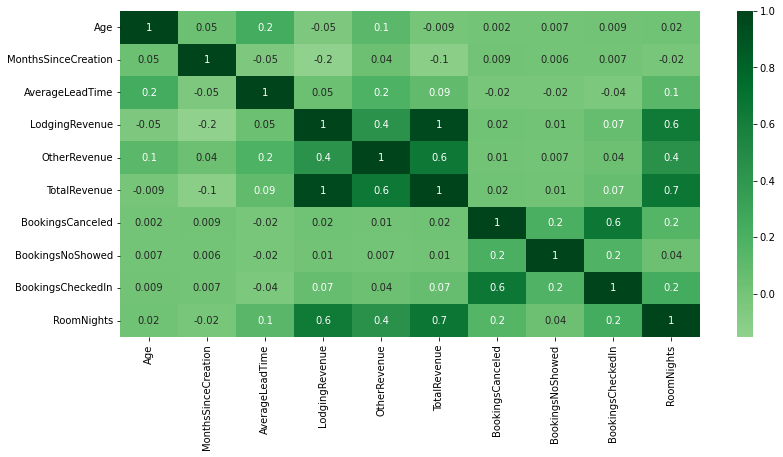

In [41]:
plt.figure(figsize = (13, 6))
sns.heatmap(df2.corr(), center = 0, cmap = 'Greens', annot = True, fmt = '.1g', linecolor = 'white')

Можем заметить, что корреляции между данными в целом очень слабые. Интересно выглядят корреляции у переменной **OtherRevenue**. Так, например, наблюдается слабая линейная связь (0.4) с переменными **LodgingRevenue** (т.е. чем выше стандартные расходы, тем выше дополнительные - в целом логично, что если человек заказывает более дорогой номер, то он готов позволить себе доп. расходы на еду в гостинице, СПА и т.д.) и **RoomNights** (тоже довольно логично, если человек часто путешествует или бронирует номер на большое количество ночей за раз, то наверняка он может себе позволить доп. расходы на сервис в гостинице).

У переменной **TotalRevenue** наблюдается высокая корреляция (0.7) с переменной **RoomNights**. Это очень логично, поскольку в общие расходы входят стандартные расходы, которые включают в себя стоимость номера. Чем больше накопленное количество ночей за период существования аккаунта (чем больше у гостя путешествий или чем они дольше), тем выше его суммарные расходы. На корреляцию с переменными **LodgingRevenue** и **OtherRevenue** не смотрим, т.к. именно из них и состоит переменная общих расходов, поэтому линейная связь очевидна.

## 2. Проверка гипотез

### 2.1. Проверка гипотезы о наличии связи между каналом бронирования отеля и суммарными расходами гостей

Создадим необходимые переменные. Для начала преобразуем переменную **DistributionChannel** в категориальную.

In [42]:
df['DistributionChannel'] = pd.Categorical(df['DistributionChannel'])

In [43]:
df.DistributionChannel.value_counts()

Travel Agent/Operator      49783
Direct                      7681
Corporate                   2223
Electronic Distribution      478
Name: DistributionChannel, dtype: int64

<AxesSubplot:ylabel='DistributionChannel'>

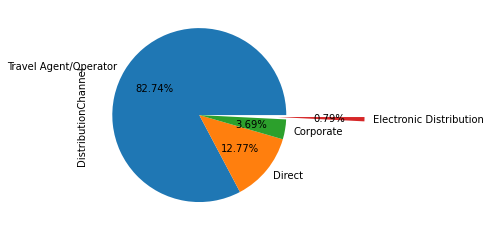

In [44]:
df.DistributionChannel.value_counts().plot.pie(autopct = '%0.2f%%', explode = [0, 0, 0, 0.9])

Как мы можем видеть, большинство гостей бронирует отель через туроператора. Около 13% пользователей совершает бронирование напрямую (самостоятельно).

Создадим категории для размеров суммарных расходов гостей.

<AxesSubplot:xlabel='TotalRevenue', ylabel='Count'>

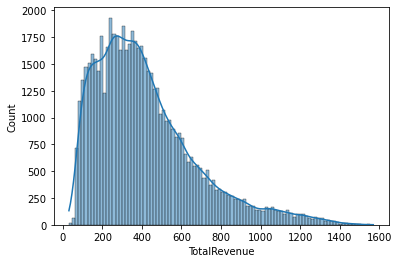

In [45]:
sns.histplot(df['TotalRevenue'], kde=True)

In [46]:
df['TotalRevenue'].describe()

count    60165.000000
mean       417.360369
std        256.338857
min         31.000000
25%        232.600000
50%        364.600000
75%        542.000000
max       1569.600000
Name: TotalRevenue, dtype: float64

In [47]:
def get_revenue_cat(expenses):
    if expenses <= 250:
        return 'Низкие расходы'
    elif expenses <= 500:
        return 'Средние расходы'
    elif expenses <= 900:
        return 'Высокие расходы'
    elif expenses > 900:
        return 'Очень высокие расходы'
    else:
        return expenses

In [48]:
df['RevenueCat'] = df['TotalRevenue'].apply(get_revenue_cat)

<AxesSubplot:ylabel='RevenueCat'>

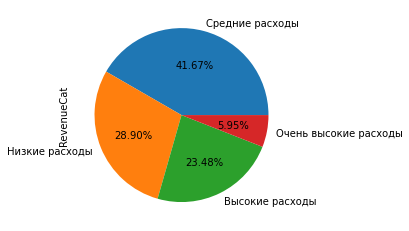

In [49]:
df.RevenueCat.value_counts().plot.pie(autopct = '%0.2f%%')

Как мы можем видеть, наименьшую долю составляют гости с очень высокими расходами, а наибольшую - со средними. Гости с низкими расходами составляют около трети всех гостей, а с высокими - около четверти.

Перейдем к непосредственной проверке гипотезы.

#### H0: Размер суммарных расходов никак не связан с каналом бронирования
#### Н1: Связь между размером суммарных расходов и каналом бронирования существует

In [50]:
import scipy.stats

In [51]:
ct_channels = df.groupby('DistributionChannel')['RevenueCat'].value_counts().unstack()
ct_channels

RevenueCat,Высокие расходы,Низкие расходы,Очень высокие расходы,Средние расходы
DistributionChannel,,,,
Corporate,289,1125,121,688
Direct,1852,2551,624,2654
Electronic Distribution,76,280,11,111
Travel Agent/Operator,11909,13431,2823,21620


In [52]:
scipy.stats.chi2_contingency(ct_channels, correction = False)

(1052.1129194482226,
 9.941340844915413e-221,
 9,
 array([[  521.93298429,   642.42169035,   132.23829469,   926.40703067],
        [ 1803.40407213,  2219.72154907,   456.91513338,  3200.95924541],
        [  112.22850494,   138.1365578 ,    28.43450511,   199.20043214],
        [11688.43443863, 14386.72020278,  2961.41206682, 20746.43329178]]))

Извлечем из полученного результата наблюдаемое значение статистики хи-квадрат.

In [53]:
chi_obs = scipy.stats.chi2_contingency(ct_channels, correction = False)[0]

In [54]:
alpha = 0.05 # уровень значимости
critical_value = scipy.stats.chi2.ppf(0.95, 9) # 9 - число степеней свободы
critical_value

16.918977604620448

In [55]:
if chi_obs > critical_value:
    print('Отвергаем Н0')
else:
    print('Не отвергаем Н0')

Отвергаем Н0


Таким образом, **связь между размером суммарных расходов гостя и каналом бронирования отеля *существует***.

### 2.2. Проверка гипотезы о нормальности распределения

#### H0: Переменная TotalRevenue распределена нормально
#### Н1: Распределение переменной TotalRevenue не является нормальным

Сначала построим график нормальности распределения распределения переменной **TotalRevenue**.

In [56]:
from scipy import stats

<Figure size 432x288 with 0 Axes>

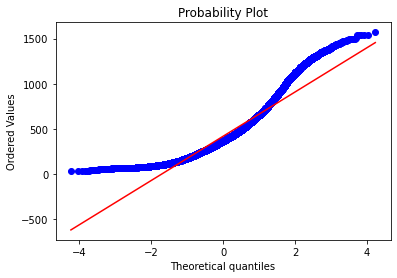

<Figure size 432x288 with 0 Axes>

In [57]:
stats.probplot(df.TotalRevenue, plot = plt)
plt.figure()

По графику видно, что распределение переменной, скорее всего, не является нормальным. Проверим это с помощью **критерия согласия Колмогорова-Смирнова**, т.к. он больше подходит для больших выборок (в отличие от теста Шапиро-Уилка - его не делаем, т.к. у нас большая выборка, а он скорее для маленьких).

In [58]:
D, p = stats.kstest(df.TotalRevenue, 'norm')
print(p)

0.0


Мы отвергаем гипотезу о нормальности распределения переменной **TotalRevenue**, т.к. p-value = 0.0, что говорит о том, что нулевая гипотеза отвергается при любом уровне значимости.

Чтобы **нормализовать данные**, мы можем прологарифмировать рассматриваемую переменную.

In [59]:
df['TotalRevenue_Log'] = np.log(df['TotalRevenue'])

<Figure size 432x288 with 0 Axes>

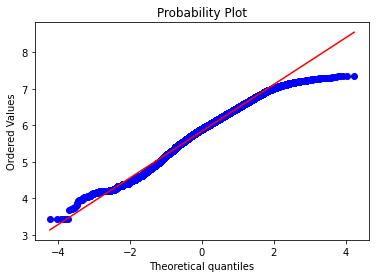

<Figure size 432x288 with 0 Axes>

In [60]:
stats.probplot(df.TotalRevenue_Log, plot = plt)
plt.figure()

Можно считать, что удалось нормализовать распределение переменной **TotalRevenue**.

### 2.3. Проверка гипотезы о равенстве средних значений

Проверим, равны ли **средние суммарные расходы** гостей, которые **бронируют отель через туроператоров**, и средние суммарные расходы гостей, которые **бронируют отель самостоятельно** (онлайн через корп. каналы, через агрегаторы или через отдел продаж с помощью менеджера отеля). Эта гипотеза связана с предположением о том, что бронирование через туристические агенства / туроператоров сопряжены с доп. издержками, т.к. они берут комиссию. Если средние значения суммарных расходов окажутся статистически равными, то, возможно, агентсткий сбор не был включен в переменную расходов.

#### H0: Средние значения суммарных расходов тех, кто бронирует отель через туроператора, и тех, кто бронирует отель самостоятельно, равны
#### Н1: Средние значения суммарных расходов тех, кто бронирует отель через туроператора, и тех, кто бронирует отель самостоятельно, НЕ равны

Создадим датасеты для сумммарных расходов гостей по выделенным категориям. К **категории самостоятельного бронирования** относятся следующие каналы: **Direct** (через менеджера отдела продаж отделя), **Corporate** (онлайн через сайт отеля), **ElectronicChannel** (через агрегаторы Booking.com, Airbnb и т.д.).

In [61]:
TravelOperatorBooking = df[df['DistributionChannel'] == 'Travel Agent/Operator']['TotalRevenue']
SelfBooking = df[(df['DistributionChannel'] == 'Direct') | (df['DistributionChannel'] == 'Corporate')\
                | (df['DistributionChannel'] == 'ElectronicChannel')]['TotalRevenue']

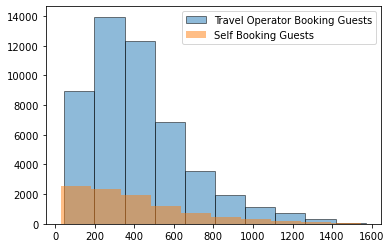

In [62]:
plt.hist(TravelOperatorBooking, alpha = 0.5, edgecolor = 'black', label = 'Travel Operator Booking Guests')
plt.hist(SelfBooking, alpha = 0.5, label = 'Self Booking Guests')
plt.legend(loc = 'upper right')
plt.show()

Как мы можем видеть на графике распределения, суммарные расходы тех, кто бронирует отели через туроператоров, значительно выше расходов гостей, бронирующих номера самостоятельно.

Проверим, равны ли дисперсии суммарных расходов по выбранным категориям.

In [63]:
# визуально
print(TravelOperatorBooking.var())
print(SelfBooking.var())

62586.82395111699
81168.57868265497


In [64]:
# с помощью критерия Флигнера-Килина
stats.fligner(TravelOperatorBooking, SelfBooking)

FlignerResult(statistic=216.7214647909454, pvalue=4.69396277421685e-49)

Выведя дисперсии мы увидели, что они не равны. Также проверили **гипотезу о равенстве дисперсий** с помощью критерия Флигнера-Килина, в результате чего она так же **отверглась** (p-value очень маленькое).

Теперь можем переходить к **проверке гипотезы о равенстве средних значений суммарных расходов в зависимости от канала бронирования**. Для проверки будем использовать **t-test**.

In [65]:
scipy.stats.ttest_ind(TravelOperatorBooking, SelfBooking, equal_var=False)

Ttest_indResult(statistic=5.713912696042768, pvalue=1.1280902646605884e-08)

Мы видим, что p-value очень маленькое, следовательно, мы **отвергаем нулевую гипотезу** о равенстве средних значений суммарных расходов у гостей, бронирующих отель через туроператора, и у гостей, бронирующих отель самостоятельно. **Разница между средними значениями статистически значима**. Ориентируясь на график распределения суммарных расходов и результаты проверки гипотезы, мы можем предположить, что **в среднем суммарные расходы при бронировании через туроператора выше, чем при самостоятельном бронировании**.

## 3. Линейная регрессия

In [66]:
import statsmodels.api as sm

Корреляционную матрицу мы уже строили ранее, но выведем ее еще раз для проверки на **мультиколлинеарность**.

<AxesSubplot:>

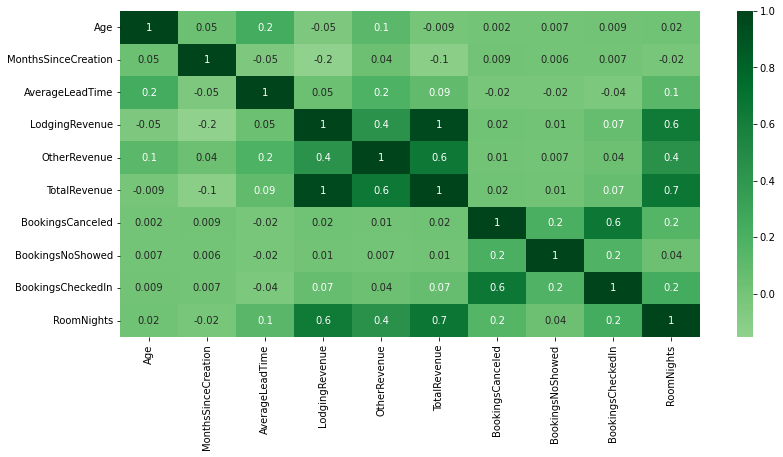

In [67]:
plt.figure(figsize = (13, 6))
sns.heatmap(df2.corr(), center = 0, cmap = 'Greens', annot = True, fmt = '.1g', linecolor = 'white')

### 3.1. Линейная регрессия_1

Возьмем в качестве зависимой переменной **TotalRevenue** (величина суммарных расходов). В качестве регрессоров возьмем количественные переменные **Age** (возраст гостя), **MonthsSinceCreation** (срок существования аккаунта в месяцах), **AverageLeadTime** (среднее кол-во дней между бронью и заездом), **BookingsCheckedIn** (кол-во заездов (чек-инов)) и **RoomNights** (количество забронированных ночей).

In [68]:
X_mult = df[['Age', 'AverageLeadTime', 'MonthsSinceCreation', 'BookingsCheckedIn', 'RoomNights']]
y = df['TotalRevenue']
X_constant = sm.add_constant(X_mult)

mod = sm.OLS(y, X_constant)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:           TotalRevenue   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                 1.002e+04
Date:                Wed, 14 Dec 2022   Prob (F-statistic):               0.00
Time:                        16:54:09   Log-Likelihood:            -4.0085e+05
No. Observations:               60165   AIC:                         8.017e+05
Df Residuals:                   60159   BIC:                         8.018e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 233.7276    

Все переменные **статистически значимы** на уровне значимости 0.05. Из интересных результатов: мы видим, что **при росте числа забронированных ночей (RoomNights) на 1, суммарные расходы вырастают примерно на 106 евро**. Это логично, поскольку суммарные расходы - это сумма общих расходов (стандартные + доп.) за время существования аккаунта гостя, поэтому с увеличением кол-ва забронированных ночей растет и сумма расходов. Также интересно, что **если среднее время между бронью и заездом в номер вырастает на 1 день, то суммарные доходы падают на 0.02 евро** (такая маленькая сумма, т.к. всего 1 день, большее количество дней будет более значимым), но в целом можно предположить, что если человек бронирует номер сильно заранее (т.е. кол-во дней между бронью и заездом большое), то номер его суммарные расходы будут ниже - это логично, поскольку обычно чем ближе дата заезда, тем дороже номер.

### Проверка остатков Линейной регрессии_1 на нормальность

Для удобства сначала построим Линейную регрессию_1 с помощью другой команды.

In [69]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_mult, y)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_mult, y))

[-2.51617517e-01 -2.29605615e-02 -1.09596805e+00 -6.79444005e+01
  1.06291952e+02]
233.72761368201418
0.454335759680202


In [70]:
y_pred = reg.predict(X_mult)

Text(0, 0.5, 'Predicted values')

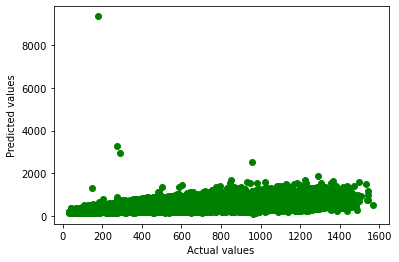

In [71]:
plt.scatter(y, y_pred, color = 'g')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

In [72]:
err = y - y_pred
err_d = pd.DataFrame(data = err)

<Figure size 432x288 with 0 Axes>

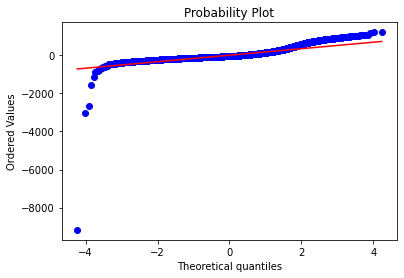

<Figure size 432x288 with 0 Axes>

In [73]:
stats.probplot(err, plot = plt)
plt.figure()

Можем видеть, что **распределение остатков не нормальное**.

In [74]:
D, p = stats.kstest(err, 'norm')
print('p-value', p)

p-value 0.0


**Критерий Колмогорова-Смирнова подтверждает ненормальность распределения остатков**. С этим можно бороться нормализацией (логарифмирование, кв./куб. корень, z-score normalization, min/max normalization).

<AxesSubplot:xlabel='TotalRevenue', ylabel='Count'>

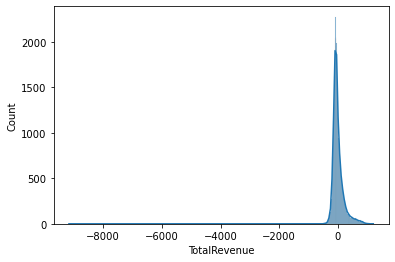

In [75]:
sns.histplot(err, kde=True)

In [76]:
from scipy.stats import kurtosis
from scipy.stats import skew

print('Эксцесс', kurtosis(err))
print('Асимметрия', skew(err))

Эксцесс 97.45640743736209
Асимметрия -0.26915895656143


Как мы можем видеть, показатель асимметрии близок к нулю, однако показатель эксцесса очень высокий.

### Метрики качества Линейной регрессии_1

In [77]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('MAE = %s' % mean_absolute_error(reg.predict(X_mult),y))
print('RMSE = %s' % mean_squared_error(reg.predict(X_mult),y))
print('R2 = %s' % r2_score(y, y_pred))

MAE = 129.12834009929858
RMSE = 35854.78812925058
R2 = 0.454335759680202


### Убираем выбросы из Линейной регресии_1

Качество полученное модели невысокое. Как мы можем видеть по **коэффициенту детерминации (R2)**, **выбранные регрессоры объясняют 45% изменений зависимой переменной**. Показатель **RMSE очень высокий**. Можно попробовать еще раз убрать выбросы - возможно, в таком случае метрика качества улучшится.

In [78]:
mean_tot = df['TotalRevenue'].mean()
std_tot = df['TotalRevenue'].std()
std_outlier_threshold_bottom_tot = mean_tot - 2.5 * std_tot
std_outlier_threshold_up_tot = mean_lodg + 2.5 * std_tot
print('Нижняя граница =', std_outlier_threshold_bottom_tot)
print('Верняя граница =', std_outlier_threshold_up_tot)
df[df['TotalRevenue'] > std_outlier_threshold_up_tot].shape

Нижняя граница = -223.4867726998787
Верняя граница = 1020.7325066654665


(2257, 21)

Метод 2.5 среднеквадратических отклонений выявил **2257 выбросов**, удалим их.

In [79]:
df_clean = df[df['TotalRevenue'] <= std_outlier_threshold_up_tot]

### 3.2. Линейная регрессия_2

То же самое, что Линейная регрессия_1, только на данных, очищенных от выбросов.

In [80]:
X_mult_clean = df_clean[['Age', 'AverageLeadTime', 'MonthsSinceCreation', 'BookingsCheckedIn', 'RoomNights']]
y_clean = df_clean['TotalRevenue']
reg_clean = LinearRegression().fit(X_mult_clean, y_clean)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_mult_clean, y_clean))

[-2.51617517e-01 -2.29605615e-02 -1.09596805e+00 -6.79444005e+01
  1.06291952e+02]
233.72761368201418
0.47139266300014204


In [81]:
y_pred_clean = reg.predict(X_mult_clean)

### Метрики качества Линейной регрессии_2

In [82]:
print('MAE = %s' % mean_absolute_error(reg.predict(X_mult_clean),y_clean))
print('RMSE = %s' % mean_squared_error(reg.predict(X_mult_clean),y_clean))
print('R2 = %s' % r2_score(y_clean, y_pred_clean))

MAE = 113.06811409527182
RMSE = 23706.079467027615
R2 = 0.47139266300014204


Можем заметить, что **R2** немного вырос - с 45% до 47%. Метрика **RMSE** все еще очень высокая, но ее значение уменьшилось. Коэффициент **MAE** также уменьшился, что говорит о том, что модель немного улучшилась по сравнению с предыдущей.

### 3.3. Линейная регрессия_3

Попробуем преобразовать данные с помощью **Z-score нормализации** - это преобразование позволяет сгладить данные и избавить их от выбросов, поэтому делаем это на данных из первой модели, а не clean.

In [83]:
df['TotalRevenueZScore'] = scipy.stats.zscore(df['TotalRevenue'])

In [84]:
X_mult = df[['Age', 'AverageLeadTime', 'MonthsSinceCreation', 'BookingsCheckedIn', 'RoomNights']]
y_zscore = df['TotalRevenueZScore']
reg_clean = LinearRegression().fit(X_mult, y_zscore)
print(reg.coef_)
print(reg.intercept_)
print(reg.score(X_mult, y_zscore))

[-2.51617517e-01 -2.29605615e-02 -1.09596805e+00 -6.79444005e+01
  1.06291952e+02]
233.72761368201418
-203810.4805263918


### Метрики качества Линейной регрессии_3

In [85]:
print('MAE = %s' % mean_absolute_error(reg.predict(X_mult),y_zscore))
print('RMSE = %s' % mean_squared_error(reg.predict(X_mult),y_zscore))
print('R2 = %s' % r2_score(y_zscore, y_pred))

MAE = 417.3603686528712
RMSE = 203811.4805263917
R2 = -203810.4805263918


Z-score нормализация негативно повлияла на метрики качества модели (показатель RMSE уменьшился, MAE вырос в 4 раза, а R2 и вовсе стал отрицательным, чего не должно быть). Поэтому **наилучший вариант** из построенных линейных регрессий - **Линейная регрессия_2**.

### 3.4. Построение Линейной регрессии_2 на тестовой и валидационной выборках

In [86]:
from sklearn.model_selection import train_test_split

X = df_clean[['Age', 'AverageLeadTime', 'MonthsSinceCreation', 'BookingsCheckedIn', 'RoomNights']]
y = df_clean['TotalRevenue']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = LinearRegression().fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
error_valid = mean_squared_error(y_valid, y_pred)
error_train = mean_squared_error(y_train, y_pred_train)
print(
        "Ошибка на валидации %.3f\nОшибка на обучении %.3f" %
        (error_valid, error_train))

Ошибка на валидации 21235.995
Ошибка на обучении 23460.917


Как мы можем видеть, значения ошибок достаточно близки друг к другу, на валидации ошибка чуть меньше.

## 4. Логистическая регрессия

В качестве зависимой переменной у нас будет бинарная переменная на основе **TotalRevenue**. Она будет принимать значение 1, если суммарные расходы гостя выше среднего и 0, если ниже.

В качестве регрессоров возьмем количественные переменные **Age**, **MonthsSinceCreation**, **AverageLeadTime**, **BookingsCheckedIn**, **RoomNights**, категориальную переменную **ChannelDistribution**, а также бинарные переменные **SRBathtub**, **SRShower**, **SRCrib**, **SRKingSizeBed** и **SRTwinBed**.

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, confusion_matrix, plot_confusion_matrix, plot_roc_curve

### 4.1. Преобразование переменных

Поработаем с переменной **Channel Distribution**. Сделаем так, чтобы у нас было 2 категории: самостоятельное бронирование (через сайт, агрегаторы или офис продаж) и бронирование через туроператора.

In [88]:
def get_channel_cat(channel):
    if channel != 'Travel Agent/Operator':
        return 'SelfBooking'
    elif channel == 'Travel Agent/Operator':
        return 'Travel Agent/Operator'
    else:
        return channel

In [89]:
df_clean['BookingChannel'] = df_clean['DistributionChannel'].apply(get_channel_cat)

In [90]:
df_clean['DistributionChannel'].value_counts()

Travel Agent/Operator      48020
Direct                      7277
Corporate                   2139
Electronic Distribution      472
Name: DistributionChannel, dtype: int64

In [91]:
df_clean['BookingChannel'].value_counts()

Travel Agent/Operator    48020
SelfBooking               9888
Name: BookingChannel, dtype: int64

Видим, что все перекодировалось правильно, поэтому можем делать из новой переменной **дамми-переменную**.

In [92]:
BookingChannel_Dummy = pd.get_dummies(df_clean.BookingChannel)
BookingChannel_Dummy

,SelfBooking,Travel Agent/Operator
0,1,0
1,0,1
3,0,1
5,0,1
7,0,1
...,...,...
83475,0,1
83477,0,1
83479,0,1
83482,1,0


In [93]:
merged = pd.concat([df_clean, BookingChannel_Dummy], axis = 1)
merged[:2]

,Age,DaysSinceCreation,AverageLeadTime,LodgingRevenue,OtherRevenue,BookingsCanceled,BookingsNoShowed,BookingsCheckedIn,RoomNights,DistributionChannel,...,SRKingSizeBed,SRTwinBed,SRNoAlcoholInMiniBar,TotalRevenue,MonthsSinceCreation,RevenueCat,TotalRevenue_Log,BookingChannel,SelfBooking,Travel Agent/Operator
0,51.000000,150,45,371.0,105.3,1,0,3,5,Corporate,...,0,0,0,476.3,12.50,Средние расходы,6.166048,SelfBooking,1,0
1,47.292878,1095,61,280.0,53.0,0,0,1,5,Travel Agent/Operator,...,0,0,0,333.0,91.25,Средние расходы,5.808142,Travel Agent/Operator,0,1


Бинарные переменные мы не будем переводить в дамми, поскольку значение 1 тут имеет больший вес. 

Создадим необходимую зависимую переменную, отсортировав значения переменной **TotalRevenue** как те, которые больше или равны среднему значению, и те, которые меньше него.

In [94]:
merged['TotalRevenue'].mean()

388.0241277543766

In [95]:
def get_expenses_cat(revenue):
    if revenue >= 388.0241277543766:
        return '1'
    elif revenue < 388.0241277543766:
        return '0'
    else:
        return revenue

In [96]:
merged['TotalRevenue_Cat'] = merged['TotalRevenue'].apply(get_expenses_cat)

In [97]:
merged['TotalRevenue_Cat'].value_counts()

0    32551
1    25357
Name: TotalRevenue_Cat, dtype: int64

### 4.2. Анализ данных

<AxesSubplot:xlabel='TotalRevenue_Cat', ylabel='RoomNights'>

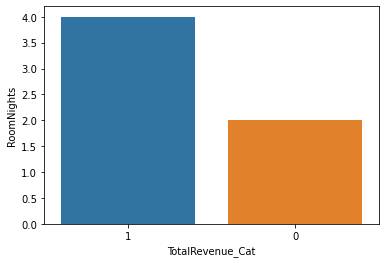

In [98]:
sns.barplot(x = 'TotalRevenue_Cat', y = 'RoomNights', data = merged, estimator = np.median) 

Как мы можем видеть, у гостей с сумарными расходами выше среднего медианное значение забронированных ночей выше, чем этот же показатель у гостей с суммарными расходами ниже среднего (4 ночи против 2 ночей).

<AxesSubplot:xlabel='TotalRevenue_Cat', ylabel='BookingsCheckedIn'>

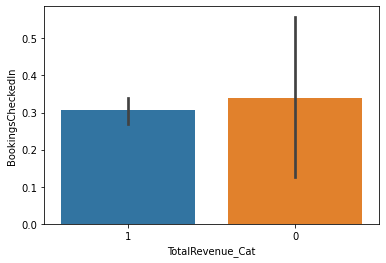

In [99]:
sns.barplot(x = 'TotalRevenue_Cat', y = 'BookingsCheckedIn', data = merged, estimator = np.std) 

<AxesSubplot:xlabel='TotalRevenue_Cat', ylabel='AverageLeadTime'>

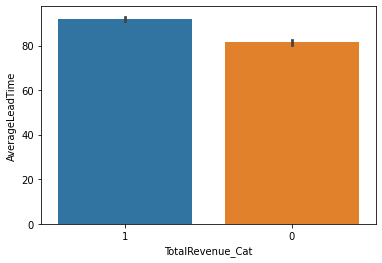

In [100]:
sns.barplot(x = 'TotalRevenue_Cat', y = 'AverageLeadTime', data = merged, estimator = np.mean) 

Мы можем видеть, что у людей с суммарными расходами выше среднего в среднем проходит больше дней между букингом и заездом.

<AxesSubplot:xlabel='TotalRevenue_Cat', ylabel='Age'>

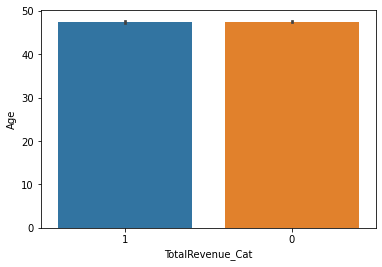

In [101]:
sns.barplot(x = 'TotalRevenue_Cat', y = 'Age', data = merged, estimator = np.mean) 

Скорее всего, возраст гостя не будет влиять на попадание в ту или иную категорию суммарных расходов (выше/ниже среднего).

<AxesSubplot:xlabel='TotalRevenue_Cat', ylabel='MonthsSinceCreation'>

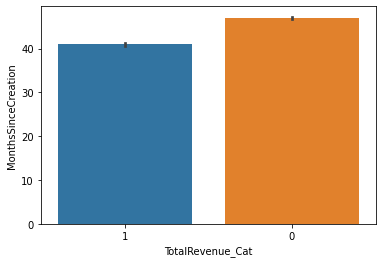

In [102]:
sns.barplot(x = 'TotalRevenue_Cat', y = 'MonthsSinceCreation', data = merged, estimator = np.mean) 

Как мы можем видеть, средний возраст аккаунта в месяцах выше у людей с суммарными расходами ниже среднего. Возможно, они менее активно пользуются своим аккаунтом / менее активно бронируют номера по сравнению с гостями, чьи суммарные расходы выше среднего.

Посмотрим на **формат** наших данных.

In [103]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57908 entries, 0 to 83484
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Age                    57908 non-null  float64 
 1   DaysSinceCreation      57908 non-null  int64   
 2   AverageLeadTime        57908 non-null  int64   
 3   LodgingRevenue         57908 non-null  float64 
 4   OtherRevenue           57908 non-null  float64 
 5   BookingsCanceled       57908 non-null  int64   
 6   BookingsNoShowed       57908 non-null  int64   
 7   BookingsCheckedIn      57908 non-null  int64   
 8   RoomNights             57908 non-null  int64   
 9   DistributionChannel    57908 non-null  category
 10  MarketSegment          57908 non-null  object  
 11  SRBathtub              57908 non-null  int64   
 12  SRShower               57908 non-null  int64   
 13  SRCrib                 57908 non-null  int64   
 14  SRKingSizeBed          57908 non-null 

Переведем переменную **TotalRevenue_Cat** в формат int.

In [104]:
merged['TotalRevenue_Cat'] = merged['TotalRevenue_Cat'].astype(int)

In [105]:
merged['TotalRevenue_Cat'].value_counts()

0    32551
1    25357
Name: TotalRevenue_Cat, dtype: int64

### 4.3. Построение логистической регрессии

Построим логистическую регрессию первым способом. Категориальную переменную включаем только одну, чтобы не было мультиколлинеарности. Посмотрим, какие регрессоры значимы, а какие нет.

In [106]:
X = merged[['Age', 'MonthsSinceCreation', 'AverageLeadTime', 'BookingsCheckedIn', 'RoomNights',\
            'SelfBooking',\
            'SRBathtub', 'SRShower', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed']]
y = merged['TotalRevenue_Cat'].values
X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.446129
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                57908
Model:                          Logit   Df Residuals:                    57896
Method:                           MLE   Df Model:                           11
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.3491
Time:                        16:54:16   Log-Likelihood:                -25834.
converged:                       True   LL-Null:                       -39691.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.2729      0.082    -40.144      0.000      -3.433      -3.113
Ag

Уберем регрессоры **Age** и **SRShower**, поскольку они **незначимы** на уровне значимости 0.05.

In [107]:
X = merged[['MonthsSinceCreation', 'AverageLeadTime', 'BookingsCheckedIn', 'RoomNights',\
            'SelfBooking',\
            'SRBathtub', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed']]
y = merged['TotalRevenue_Cat'].values
X_constant = sm.add_constant(X)
logit = sm.Logit(y, X_constant).fit()
print(logit.summary())

Optimization terminated successfully.
         Current function value: 0.446169
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                57908
Model:                          Logit   Df Residuals:                    57898
Method:                           MLE   Df Model:                            9
Date:                Wed, 14 Dec 2022   Pseudo R-squ.:                  0.3490
Time:                        16:54:16   Log-Likelihood:                -25837.
converged:                       True   LL-Null:                       -39691.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -3.3265      0.075    -44.076      0.000      -3.474      -3.179
Mo

**Все регрессоры значимы** на уровне значимости 0.05. Метрика **PseudoR2** равна **0.349**.

### 4.4. Построение логистической регресии с применением тренировочной и валидационной выборок

In [108]:
X = merged[['MonthsSinceCreation', 'AverageLeadTime', 'BookingsCheckedIn', 'RoomNights',\
            'SelfBooking',\
            'SRBathtub', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed']]
y = merged['TotalRevenue_Cat'].values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

In [109]:
X_train.shape

(46326, 9)

In [110]:
X_valid.shape

(11582, 9)

Как мы можем видеть, данные верно разделились в пропорции 80/20 (80% тренировочная выборка, 20% - валидационная).

Нормируем данные.

In [111]:
from sklearn.preprocessing import StandardScaler
z_score_scaler = StandardScaler()
z_score_scaler.fit(X_train)
X_train_scaled = z_score_scaler.transform(X_train)
X_valid_scaled = z_score_scaler.transform(X_valid)

Строим модель.

In [112]:
log_model = LogisticRegression().fit(X_train_scaled, y_train)
y_pred = log_model.predict(X_valid_scaled)
y_pred_probs = log_model.predict_proba(X_valid_scaled)

In [113]:
y_pred

array([0, 0, 1, ..., 0, 1, 1])

In [114]:
y_pred_probs

array([[0.95790597, 0.04209403],
       [0.70949296, 0.29050704],
       [0.2775069 , 0.7224931 ],
       ...,
       [0.93867368, 0.06132632],
       [0.06724143, 0.93275857],
       [0.04053373, 0.95946627]])

### Коэффициенты модели и интерпретация результатов

Сделаем таблицу с **коэффициентами** построенной модели.

In [115]:
coef = pd.DataFrame({'Coefs' : log_model.coef_[0],
                    'Names' : ['MonthsSinceCreation', 'AverageLeadTime', 'BookingsCheckedIn', 'RoomNights',\
                               'SelfBooking', 'SRBathtub', 'SRCrib', 'SRKingSizeBed', 'SRTwinBed']})
coef = coef.append({'Coefs' : log_model.intercept_[0],
                   'Names' : 'intercept'}, ignore_index = True)
coef['Odds coef'] = np.exp(coef['Coefs'])

In [116]:
coef

,Coefs,Names,Odds coef
0,-0.361035,MonthsSinceCreation,0.696954
1,-0.113998,AverageLeadTime,0.892260
2,-0.203905,BookingsCheckedIn,0.815540
3,2.207618,RoomNights,9.094026
4,0.141021,SelfBooking,1.151449
5,-0.020832,SRBathtub,0.979383
6,0.035737,SRCrib,1.036383
7,0.195117,SRKingSizeBed,1.215453
8,0.176195,SRTwinBed,1.192670
9,-0.261211,intercept,0.770118


Мы вывели не только коэффициенты, но и шансы, чтобы было удобнее **интерпретировать** результаты модели. Сильнее всего на вероятность попадания в ту или иную категорию влияет переменная **RoomNights**. 
- При увеличении количества забронированных ночей на 1 ночь (переменная **RoomNights**), шанс попадания в категорию гостей с суммарными расходами выше среднего увеличивается в 9 раз.
- Если гости обычно просят кровать типа king-size или twin bed (переменные **SRKingSizeBed** и **SRTwinBed**), то вероятность того, что они попадут в категорию гостей с суммарными расходами выше среднего увеличивается примерно в 1.2 раза в обоих случаях (по сравнению с ситуацией, когда гости об этом не просят). Это можно объяснить тем, что некоторые гости предъявляют повышенные требования к комфорту / типу мебели в номере, поэтому растет сумма чека.
- Также мы видим, что при увеличении возраста аккаунта на 1 месяц (переменная **MonthsSinceCreation**), вероятность попадания в категорию гостей с суммарными расходами выше среднего уменьшается примерно в 1.4 раза (растет в 0.7 раз).
- Интересно, что при самостоятельном бронировании (переменная **SelfBooking**) вероятность попадания в категорию гостей с суммарными расходами выше среднего увеличивается в 1.15 раз. Возможно, туроператоры находят более выгодные варианты для гостей, за счет чего им удается немного сэкономить средства.

### Метрики качества модели

Построим матрицу ошибок.

In [117]:
ex = pd.DataFrame(data = [['TN', 'FP'],['FN', 'TP']], columns = ['Negative (0)', 'Positive (1)'], index = ['Negative (0)', 'Positive (1)'])
ex

,Negative (0),Positive (1)
Negative (0),TN,FP
Positive (1),FN,TP


####  accuracy_score - доля правильных ответов алгоритма

$$
accuracy = \frac{TP + TN}{TP + TN + FP + FN}
$$

#### F метрика учитывает FP и FN, она близка к 0, если один из аргументов близок к 0

$$
F1 = 2 \cdot \frac{precision \cdot recall} {precision + recall}
$$

#### recall (полнота) показывает, какую долю объектов положительного класса из всех объектов положительного класса нашел алгоритм

$$
recall = \frac{TP}{TP + FN}
$$

#### precision (точность) - доля объектов, названных классификатором положительными и при этом действительно являющиеся положительными

$$
precision = \frac{TP}{TP + FP}
$$

Рассчитаем все метрики для **валидационной выборки**.

In [118]:
print('Accuracy :', accuracy_score(y_valid, y_pred))
print('F1_score: ', f1_score(y_valid, y_pred))
print('Recall: ', recall_score(y_valid, y_pred))
print('Precision: ', precision_score(y_valid, y_pred))

Accuracy : 0.800725263339665
F1_score:  0.7643455176638758
Recall:  0.7406015037593985
Precision:  0.789662447257384


Как мы можем видеть, модель получилась среднего качества.
- Доля правильных ответов алгоритма (accuracy) - 80%.
- Из всех объектов положительного класса (люди с суммарными доходами выше среднего) алгоритм нашел 74% объекта положительного класса.
- Практически 79% объектов, которых модель назвала положительными, действительно являются положительными (действительно принадлежат к гостям с суммарными доходами выше среднего).

Рассчитаем все метрики для **тренировочной выборки**.

In [119]:
print('Accuracy :', accuracy_score(y_train, log_model.predict(X_train_scaled)))
print('F1_score: ', f1_score(y_train, log_model.predict(X_train_scaled)))
print('Recall: ', recall_score(y_train, log_model.predict(X_train_scaled)))
print('Precision: ', precision_score(y_train, log_model.predict(X_train_scaled)))

Accuracy : 0.7962914993740017
F1_score:  0.7592786266357167
Recall:  0.7330443776781757
Precision:  0.7874603174603174


На тестовой выборке метрики качества чуть ниже, чем на валидационной, что в целом нормально.

Выведем **матрицу ошибок**.

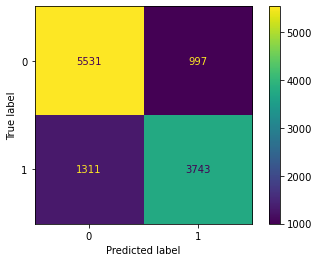

In [120]:
plot_confusion_matrix(log_model, X_valid_scaled, y_valid)

Как мы можем видеть, модель верно определила 5531 гостя с расходами выше среднего и 3743 гостя с расходами ниже среднего, при этом 997 людей ошибочно оказались в категории расходов выше среднего, а 1311 людей - в категории расходов ниже среднего (тоже ошибочно).

### ROC-кривая

Построим **ROC-кривую** (кривая ошибок). Она отражает взаимосвязь между чувствительностью модели (TPR - true positive rate) и ее специфичностью (FPR - false positive rate).

$$
TPR = \frac {TP} {TP + FN}
$$

$$
TPR = \frac {TP} {TP + FN}
$$

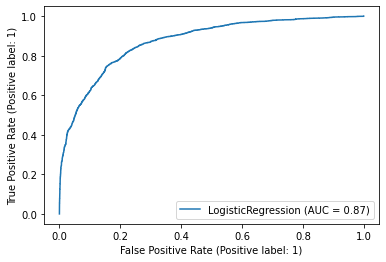

In [121]:
plot_roc_curve(log_model, X_valid_scaled, y_valid)

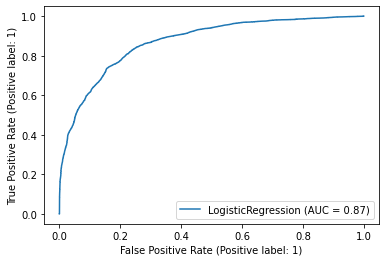

In [122]:
plot_roc_curve(log_model, X_train_scaled, y_train)

Как мы можем видеть, **AUC (area under curve)** и в случае валидационной, и в случае тренировочной выборки составляет 0.87. Это в целом неплохой показатель.

## ~ The End ~